#  Инициализация весов нейронных сетей. Способы регуляризации нейронных сетей. Продвинутые алгоритмы градиентного спуска.

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/nn.init.html
* https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/
* https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/
* https://pytorch.org/docs/stable/optim.html

## Задачи для совместного разбора

1\. Инициализируйте веса полносвязного слоя единицами, а смещения - нулями.

In [ ]:
import torch as th
import torch.nn as nn

In [ ]:
fc = nn.Linear(10, 15)

In [ ]:
# fc.weight = th.zeros_like(fc.weight)

In [ ]:
import torch.nn.init as init

In [ ]:
init.ones_(fc.weight)

Parameter containing:
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], requires_grad=True)

2\. Изучите, как работает слой `nn.Dropout` в режиме обучения модели и в режиме использования модели.

In [ ]:
x = th.ones((5, 5))
x

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [ ]:
dropout = nn.Dropout(p=0.5)
dropout(x)

tensor([[2., 2., 2., 2., 0.],
        [2., 0., 0., 0., 0.],
        [2., 2., 2., 0., 0.],
        [0., 0., 0., 2., 0.],
        [0., 0., 2., 0., 0.]])

In [ ]:
net = nn.Sequential(
    nn.Linear(5, 2),
    nn.Dropout(p=0.5),
    # nn.Linear(2, 1)
)
net.train()
x = th.ones((10, 5))
net.eval()
net(x)

tensor([[0.0515, 0.2500],
        [0.0515, 0.2500],
        [0.0515, 0.2500],
        [0.0515, 0.2500],
        [0.0515, 0.2500],
        [0.0515, 0.2500],
        [0.0515, 0.2500],
        [0.0515, 0.2500],
        [0.0515, 0.2500],
        [0.0515, 0.2500]], grad_fn=<AddmmBackward0>)

3\. Изучите, как работает слой `nn.BatchNorm1d` в режиме обучения модели и в режиме использования модели.

In [ ]:
x = th.rand(5, 3)
x

tensor([[0.9838, 0.8903, 0.0269],
        [0.2785, 0.3861, 0.0618],
        [0.4281, 0.5352, 0.4954],
        [0.1466, 0.6843, 0.9674],
        [0.5863, 0.7119, 0.5514]])

In [ ]:
x.mean(dim=0), x.std(dim=0)

(tensor([0.4847, 0.6415, 0.4206]), tensor([0.3238, 0.1906, 0.3890]))

In [ ]:
bn = nn.BatchNorm1d(num_features=3)
x1 = bn(x)
x1

tensor([[ 1.7232,  1.4593, -1.1313],
        [-0.7118, -1.4987, -1.0310],
        [-0.1951, -0.6240,  0.2149],
        [-1.1672,  0.2508,  1.5714],
        [ 0.3509,  0.4126,  0.3760]], grad_fn=<NativeBatchNormBackward0>)

In [ ]:
x1.mean(dim=0), x1.std(dim=0)

(tensor([ 7.1526e-08, -3.9935e-07,  4.7684e-08], grad_fn=<MeanBackward1>),
 tensor([1.1180, 1.1178, 1.1180], grad_fn=<StdBackward0>))

In [ ]:
bn.running_mean, bn.running_var

(tensor([0.0485, 0.0642, 0.0421]), tensor([0.9105, 0.9036, 0.9151]))

In [ ]:
y = th.rand(5, 3)
y1 = bn(y)
y1

tensor([[ 0.7099,  1.5578,  0.4620],
        [-0.9872, -0.2762, -0.6451],
        [ 1.2510,  0.7117,  1.1014],
        [-1.3474, -1.0275, -1.6284],
        [ 0.3736, -0.9658,  0.7101]], grad_fn=<NativeBatchNormBackward0>)

In [ ]:
bn.running_mean, bn.running_var

(tensor([0.0973, 0.1244, 0.1110]), tensor([0.8241, 0.8167, 0.8283]))

In [ ]:
bn.eval()

BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [ ]:
net = nn.Sequential(
    # ...
    nn.Linear(5, 2),
    nn.BatchNorm1d(2),
    nn.ReLU(),
    # nn.Linear(2, 1)
)

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Расширьте класс `torch.nn.Linear`, описав класс `InitializedLinear` и добавив возможность инициализировать веса слоя при помощи функций из пакета `torch.nn.init` (инициализацию bias оставьте по умолчанию). Обратите внимание, что данные функции имеют дополнительные параметры. Данные параметры должны передаваться в момент создания объекта класса `InitializedLinear`.

Пример создания слоя:
```
InitializedLinear(n_features, n_hidden, init_f=nn.init.uniform_, init_args={"a": 0.0, "b": 1.0})
```

- [ ] Проверено на семинаре

In [ ]:
import torch.nn as nn

In [ ]:
class InitializedLinear(nn.Linear):
  def __init__(self,n_features, n_hidden, init_f=nn.init.normal_, init_args={}):
      super().__init__(n_features, n_hidden)
      init_f(self.weight, **init_args)

In [ ]:
fc = InitializedLinear(n_features = 5, n_hidden = 2, init_f=nn.init.uniform_, init_args={"a": 0.0, "b": 1.0})

In [ ]:
fc.weight

Parameter containing:
tensor([[0.8175, 0.9183, 0.8810, 0.4640, 0.1836],
        [0.7450, 0.4858, 0.5811, 0.7329, 0.4059]], requires_grad=True)

<p class="task" id="2"></p>

2\. Решите задачу регрессии несколько раз, изменяя способ инициализации весов. Рассмотрите следующие варианты:
* `nn.init.uniform_`
* `nn.init.normal_`
* `nn.init.constant_`
* `nn.xavier_uniform_`
* `nn.kaiming_uniform_`

Визуализируйте график изменения значений MSE с ходом эпох. Дайте кривым, соответствующие разным способам инициализации, различные цвета и добавьте подписи. Для улучшения читаемости графиков можно рассматривать области экстремальных значений отдельно.

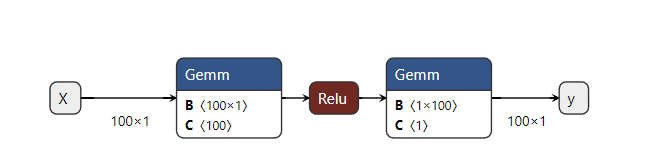

- [ ] Проверено на семинаре

In [ ]:
import matplotlib.pyplot as plt
import torch.optim as optim


In [ ]:
import torch as th
X = th.linspace(0, 1, 100).view(-1, 1)
y = th.sin(2 * th.pi * X) + 0.1 * th.rand(X.size())

In [ ]:
from torch.nn.init import uniform_, normal_, constant_, xavier_uniform_, kaiming_uniform_

In [ ]:
models = [(uniform_, {'a':0, 'b':1}),
                  (normal_, {'mean':0, 'std':1}),
                  (constant_, {'val':0.5}),
                  (xavier_uniform_,{} ),
                  (kaiming_uniform_,{} )]

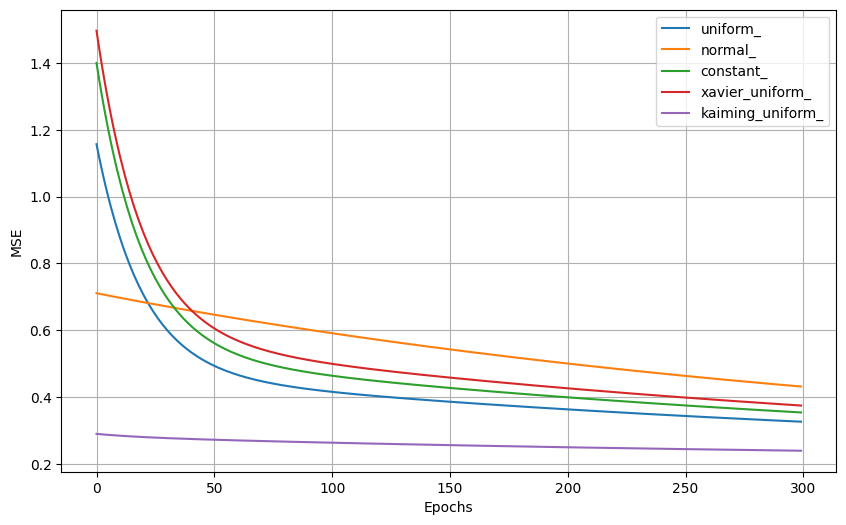

In [ ]:
num_epochs = 300
gamma = 0.01
criterion = nn.MSELoss()
mse_values = [[] for _ in models]

for k, (init_f, init_args) in enumerate(models):
    model = InitializedLinear(1, 1, init_f, init_args)
    optimizer = optim.SGD(model.parameters(), lr=gamma)


    for epoch in range(num_epochs):

        outputs = model(X)
        loss = criterion(outputs, y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        mse = loss.item()
        mse_values[k].append(mse)



plt.figure(figsize=(10, 6))
for k, (init_f, init_args) in enumerate(models):
    plt.plot(range(num_epochs), mse_values[k], label=init_f.__name__)


plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()


<p class="task" id="3"></p>

3\. Исследуйте, как добавление дропаута влияет на процесс обучения модели. Решите задачу регрессии несколько раз, изменяя значения вероятности дропаута $p$ от 0 до 0.8. В качестве модели рассмотрите нейронную сеть с одним скрытым слоем.

Визуализируйте график изменения значений $R^2$ в зависимости от вероятности дропаута $p$ на обучающей и тестовой выборке. Визуализируйте на отдельном графике зависимости разности между $R^2$ на обучающей выборки и $R^2$ на тестовой выборке.

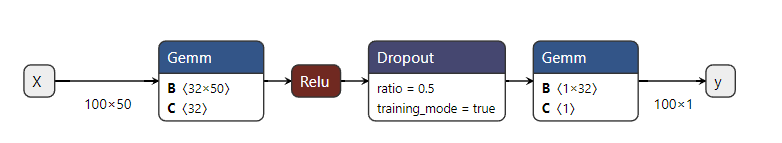

- [ ] Проверено на семинаре

In [ ]:
from sklearn.datasets import make_regression
import torch as th

th.manual_seed(42)
X, y, coef = make_regression(
    n_samples=100,
    n_features=50,
    n_informative=20,
    noise=2,
    coef=True,
    random_state=42,

)
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)

In [ ]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
probs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
train_r2_values = []
test_r2_values = []

In [ ]:
gamma=0.01
criterion = nn.MSELoss()
num_epochs = 40

In [ ]:
for p in probs:
    model = nn.Sequential(
        nn.Linear(X.shape[1], 32),
        nn.ReLU(),
        nn.Dropout(p=p),
        nn.Linear(32, 1)
    )
    optimizer = optim.SGD(model.parameters(), lr=0.001)

    train_r2 = []
    test_r2 = []

    for epoch in range(num_epochs):
        model.train()
        y_train_pred = model(X_train)
        loss = criterion(y_train_pred, y_train)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        model.eval()
        y_test_pred = model(X_test)

        train_r2_value = r2_score(y_train.detach().numpy(), y_train_pred.detach().numpy())
        test_r2_value = r2_score(y_test.detach().numpy(), y_test_pred.detach().numpy())

        train_r2.append(train_r2_value)
        test_r2.append(test_r2_value)

    train_r2_values.append(train_r2)
    test_r2_values.append(test_r2)

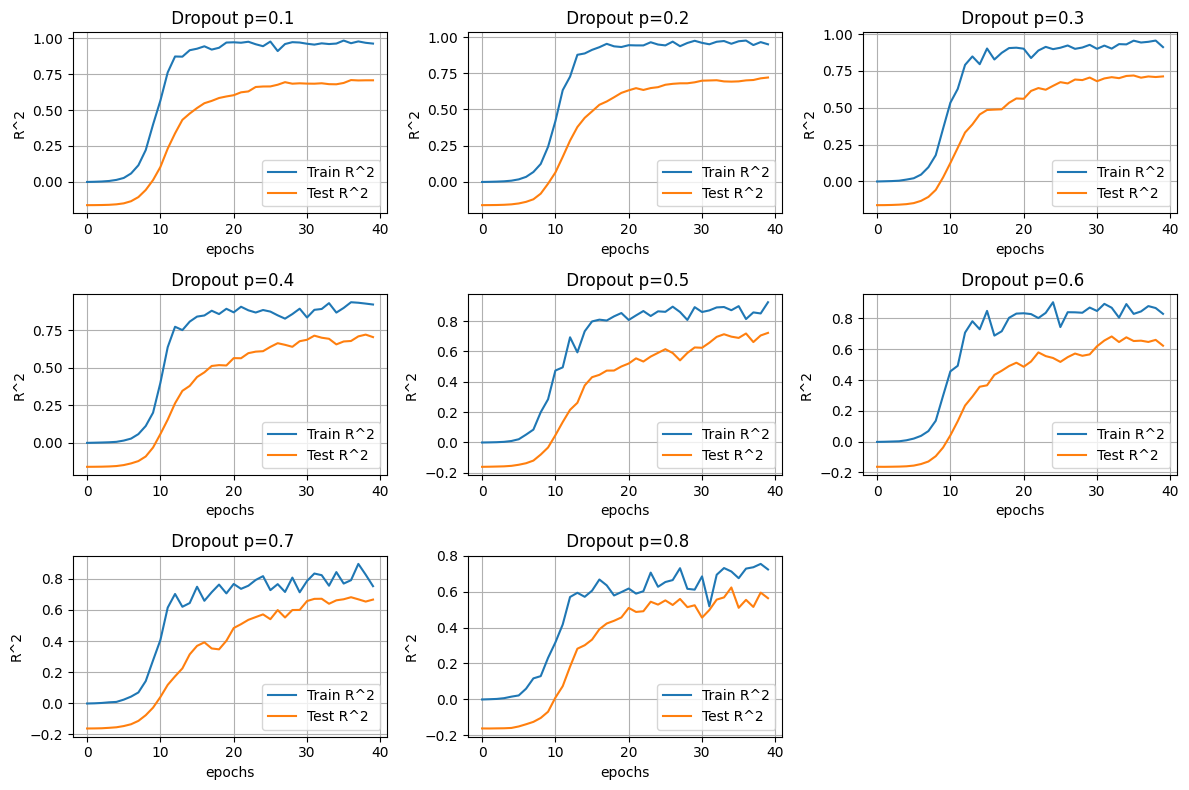

In [ ]:
plt.figure(figsize=(12, 8))
for i, p in enumerate(probs):
    plt.subplot(3, 3, i+1)
    plt.plot(range(num_epochs), train_r2_values[i], label=f'Train R^2')
    plt.plot(range(num_epochs), test_r2_values[i], label=f'Test R^2')
    plt.xlabel('epochs')
    plt.ylabel('R^2')
    plt.legend()
    plt.grid(True)
    plt.title(f' Dropout p={p}')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

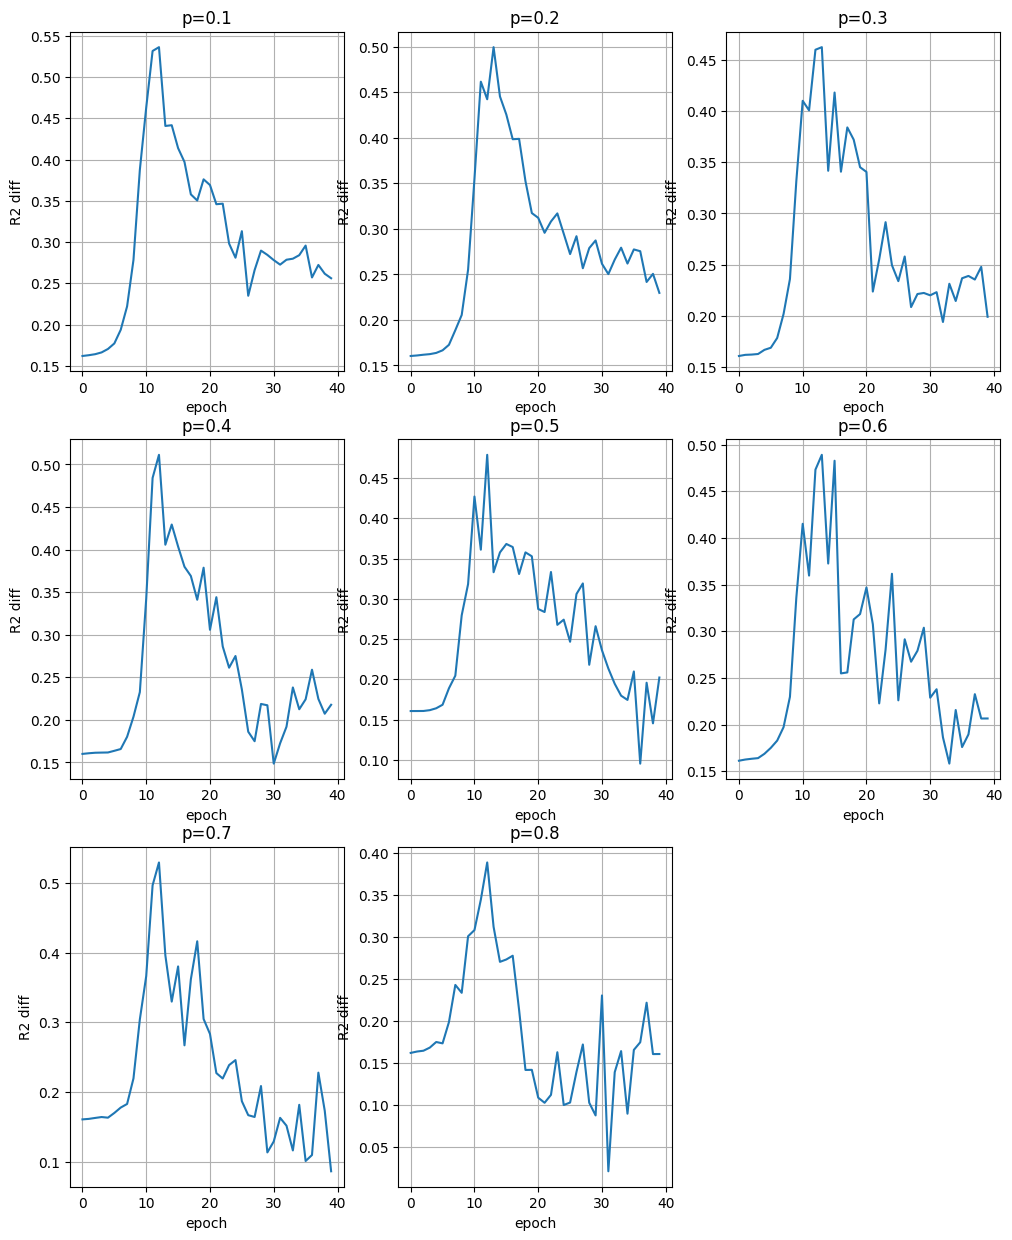

In [ ]:
plt.figure(figsize=(12, 15))
for i, p in enumerate(probs):
    plt.subplot(3, 3, i+1)
    plt.plot(range(num_epochs), np.array(train_r2_values[i]) - np.array(test_r2_values[i]))
    plt.title(f'p={p}')
    plt.xlabel('epoch')
    plt.ylabel('R2 diff')
    plt.grid(True)

plt.show()


<p class="task" id="4"></p>

4\. Решите задачу регрессии с- и без использования пакетной нормализации. Покажите, как меняется результат обучения моделей при различных значениях скорости обучения (0.001, 0.01, 0.1) за одно и то же количество эпох.

Визуализируйте график изменения значений $R^2$ в зависимости от эпохи при различных значениях скорости обучения с- и без использования пакетной нормализации.

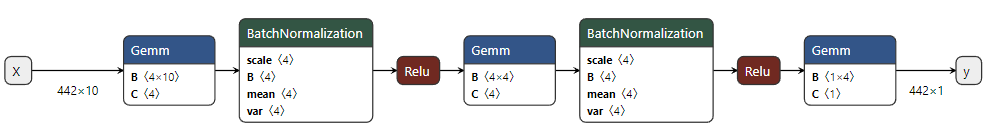

- [ ] Проверено на семинаре

In [ ]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)
y = (y - y.mean())/y.std()

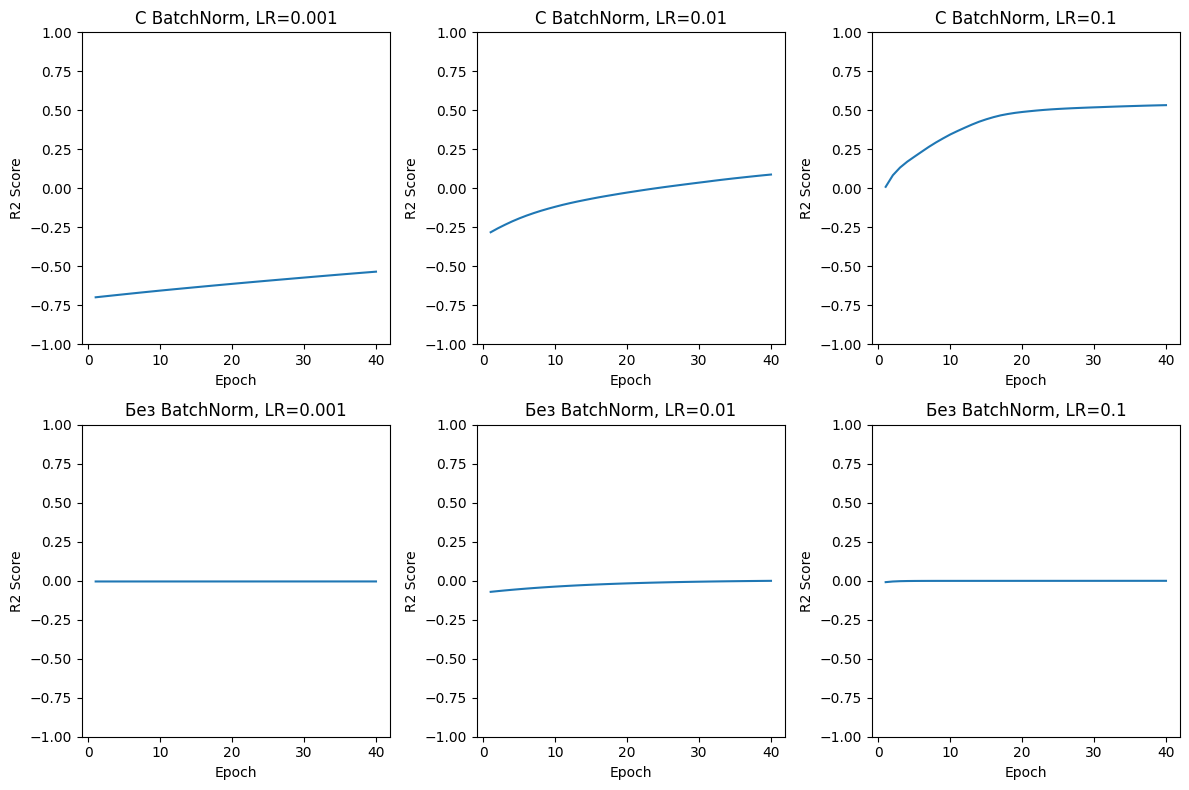

In [ ]:
crit = nn.MSELoss()
n_epochs = 40
lr = [0.001, 0.01, 0.1]

r2_scores_bn = []
r2_scores_no_bn = []

for gamma in lr:
    # с
    model_bn = nn.Sequential(
        nn.Linear(X.shape[1], 4),
        nn.BatchNorm1d(4),
        nn.ReLU(),
        nn.Linear(4, 4),
        nn.BatchNorm1d(4),
        nn.ReLU(),
        nn.Linear(4, 1)
    )
    optimizer_bn = optim.SGD(model_bn.parameters(), lr=gamma)
    r2_score_bn = []
    for epoch in range(n_epochs):
        y_pred_bn = model_bn(X)
        loss_bn = crit(y_pred_bn, y)
        loss_bn.backward()
        optimizer_bn.step()
        optimizer_bn.zero_grad()
        r2_score_bn.append(r2_score(y.detach().numpy(), y_pred_bn.detach().numpy()))
    r2_scores_bn.append(r2_score_bn)

    # без
    model_no_bn = nn.Sequential(
        nn.Linear(X.shape[1], 4),
        nn.ReLU(),
        nn.Linear(4, 4),
        nn.ReLU(),
        nn.Linear(4, 1)
    )
    optimizer_no_bn = optim.SGD(model_no_bn.parameters(), lr=gamma)
    r2_score_no_bn = []
    for epoch in range(n_epochs):
        y_pred_no_bn = model_no_bn(X)
        loss_no_bn = crit(y_pred_no_bn, y)
        loss_no_bn.backward()
        optimizer_no_bn.step()
        optimizer_no_bn.zero_grad()
        r2_score_no_bn.append(r2_score(y.detach().numpy(), y_pred_no_bn.detach().numpy()))
    r2_scores_no_bn.append(r2_score_no_bn)


plt.figure(figsize=(12, 8))
for i, gamma in enumerate(lr):
    plt.subplot(2, 3, i + 1)
    plt.plot(range(1, n_epochs + 1), r2_scores_bn[i], label=f'With BN, LR={gamma}')
    plt.title(f'С BatchNorm, LR={gamma}')
    plt.xlabel('Epoch')
    plt.ylabel('R2 Score')
    plt.ylim(-1, 1)

    plt.subplot(2, 3, i + 4)
    plt.plot(range(1, n_epochs + 1), r2_scores_no_bn[i], label=f'No BN, LR={gamma}')
    plt.title(f'Без BatchNorm, LR={gamma}')
    plt.xlabel('Epoch')
    plt.ylabel('R2 Score')
    plt.ylim(-1, 1)


plt.tight_layout()
plt.show()


<p class="task" id="5"></p>

5\. Решите задачу регрессии c использованием различных алгоритмов градиентного спуска. Покажите, как меняется результат обучения моделей при использовании различных алгоритмов (Adam, Adagram, RMSProp, SGD) за одно и то же количество эпох с одной и той же скоростью обучения. Используйте модель с архитектурой, аналогичной модели из предыдущей задачи.

Визуализируйте график изменения значений MAPE в зависимости от эпохи при использовании различных алгоритмов градиентного спуска.

- [ ] Проверено на семинаре

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
def load_boston():
    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    return data, target

In [ ]:
X, y = load_boston()
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)

In [ ]:
model = nn.Sequential(
      nn.Linear(X.shape[1], 4),
      nn.BatchNorm1d(num_features=4),
      nn.ReLU(),
      nn.Linear(4, 4),
      nn.BatchNorm1d(num_features=4),
      nn.ReLU(),
      nn.Linear(4, 1)
  )

In [ ]:
optimizers = {
    "Adam": th.optim.Adam(model.parameters(), lr=gamma),
    "Adagrad": th.optim.Adagrad(model.parameters(), lr=gamma),
    "RMSProp": th.optim.RMSprop(model.parameters(), lr=gamma),
    "SGD": th.optim.SGD(model.parameters(), lr=gamma),
}

In [ ]:
gamma = 0.01
num_epochs = 100
criterion = nn.MSELoss()

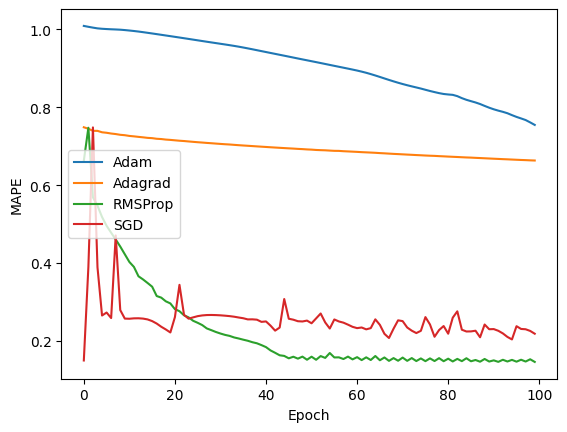

In [ ]:
mape_history = {optimizer_name: [] for optimizer_name in optimizers.keys()}

for optimizer_name, optimizer in optimizers.items():
    for epoch in range(num_epochs):

        outputs = model(X)
        loss = criterion(outputs, y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        y_pred = outputs.detach().numpy()
        mape = mean_absolute_percentage_error(y, y_pred)
        mape_history[optimizer_name].append(mape)

for optimizer_name, mape_values in mape_history.items():
    plt.plot(range(num_epochs), mape_values, label=optimizer_name)

plt.xlabel('Epoch')
plt.ylabel('MAPE')
plt.legend()
plt.show()


<p class="task" id="6"></p>

6\. Решите задачу регрессии c использованием ранней остановки. Разбейте набор данных на обучающую и валидационную выборку в соотношении 80 на 20. Остановите процесс обучения, если целевая метрика (MAPE) не уменьшалась в течении последних $k$ ($k$ - гиперпараметр метода) эпох. В момент остановки выведите сообщение с текущим номером эпохи.

- [ ] Проверено на семинаре

In [ ]:
X, y = load_boston()
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = nn.Sequential(
        nn.Linear(X.shape[1], 4),
        nn.ReLU(),
        nn.Linear(4, 4),
        nn.ReLU(),
        nn.Linear(4, 1)
    )


In [ ]:
k = 10
min_val_mape = float('inf')
no_improvement_count = 0
num_epochs = 1000
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


for epoch in range(num_epochs):

    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    val_outputs = model(X_test)
    val_mape = mean_absolute_percentage_error(y_test, val_outputs.detach().numpy())


    if val_mape < min_val_mape:
        min_val_mape = val_mape
        no_improvement_count = 0
    else:
        no_improvement_count += 1


    if no_improvement_count >= k:
        print(f'Обучение завершено на эпохе {epoch + 1}')
        break


Обучение завершено на эпохе 11


## Обратная связь
- [ ] Хочу получить обратную связь по решению